秋田県

In [51]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for PC
mpl.rc('font',family='MS Gothic')

In [52]:
# 空間データなので geopandas (gpd) でインポート

akitamesh1 = gpd.read_file('data2/SDDSWS5839.zip')
akitamesh2 = gpd.read_file('data2/SDDSWS5840.zip')
akitamesh3 = gpd.read_file('data2/SDDSWS5939.zip')
akitamesh4 = gpd.read_file('data2/SDDSWS5940.zip')
akitamesh5 = gpd.read_file('data2/SDDSWS6039.zip')
akitamesh6 = gpd.read_file('data2/SDDSWS6040.zip')

↑　秋田県は6つも必要でした。。日本で6番目に面積が広い県のようです。（一方で先月時点の秋田県の人口は918,507人で日本でワースト8位くらい、、）

In [53]:
# combine all four mesh shapes
akitamesh = gpd.pd.concat([akitamesh1,akitamesh2,akitamesh3,akitamesh4,akitamesh5,akitamesh6])

<Axes: >

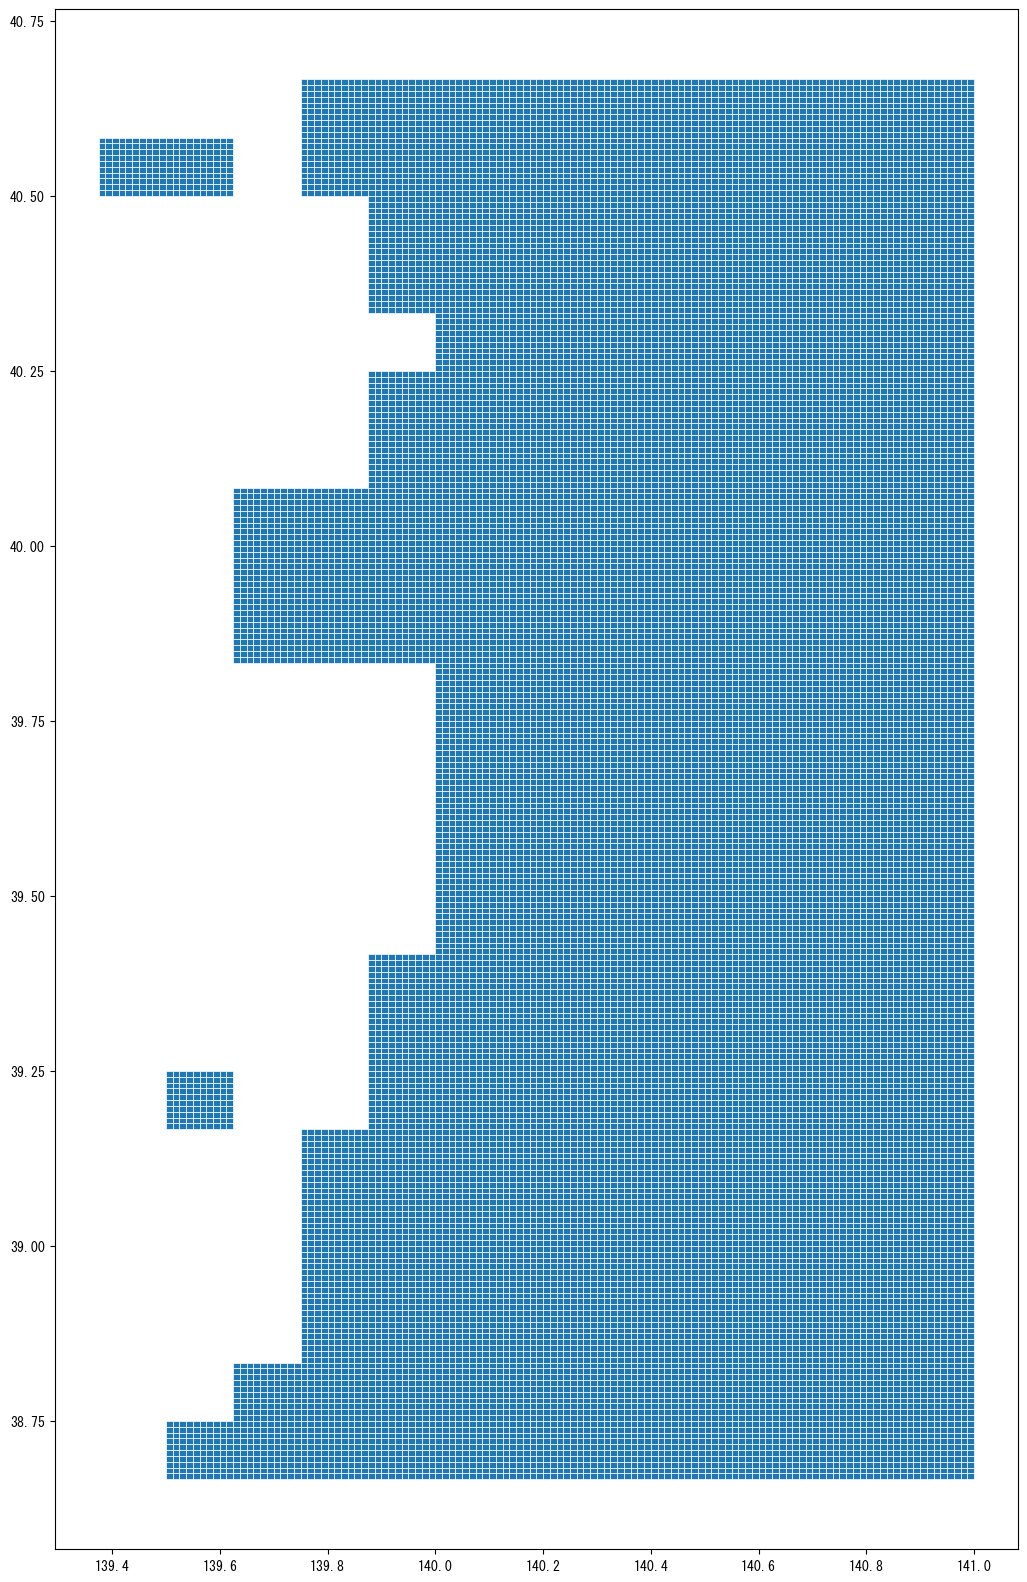

In [54]:
# quick plot
akitamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.5)

In [55]:
akitamesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,58390400,5839,04,00,1,"POLYGON ((139.51250 38.66667, 139.50000 38.666..."
1,58390401,5839,04,01,2,"POLYGON ((139.52500 38.66667, 139.51250 38.666..."
2,58390402,5839,04,02,3,"POLYGON ((139.53750 38.66667, 139.52500 38.666..."
3,58390403,5839,04,03,4,"POLYGON ((139.55000 38.66667, 139.53750 38.666..."
4,58390404,5839,04,04,5,"POLYGON ((139.56250 38.66667, 139.55000 38.666..."


In [56]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
akitadata1 = pd.read_csv('data2/tblT001100S5839.zip', encoding='cp932')
akitadata2 = pd.read_csv('data2/tblT001100S5840.zip', encoding='cp932')
akitadata3 = pd.read_csv('data2/tblT001100S5939.zip', encoding='cp932')
akitadata4 = pd.read_csv('data2/tblT001100S5940.zip', encoding='cp932')
akitadata5 = pd.read_csv('data2/tblT001100S6039.zip', encoding='cp932')
akitadata6 = pd.read_csv('data2/tblT001100S6040.zip', encoding='cp932')

In [57]:
# check data
akitadata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,58390408.0,2.0,58390409.0,NaN,5,3,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,58390409.0,1.0,NaN,58390408,238,108,130,25,13,12,...,4,3,70,48,22,5,81,0,17,23
3,58390500.0,0.0,NaN,NaN,19,5,14,0,0,0,...,0,0,2,1,1,0,2,4,0,0
4,58390509.0,0.0,NaN,NaN,50,26,24,5,4,1,...,1,1,13,7,6,0,12,0,2,4


In [58]:
akitadata1= akitadata1[1:]
akitadata2= akitadata2[1:]
akitadata3= akitadata3[1:]
akitadata4= akitadata4[1:]
akitadata5= akitadata5[1:]
akitadata6= akitadata6[1:]

In [59]:
# ４つのテーブルから「＊」を非数に置き換える
akitadata1 = akitadata1.replace('*', np.nan)
akitadata2 = akitadata2.replace('*', np.nan)
akitadata3 = akitadata3.replace('*', np.nan)
akitadata4 = akitadata4.replace('*', np.nan)
akitadata5 = akitadata5.replace('*', np.nan)
akitadata6 = akitadata6.replace('*', np.nan)

In [60]:
akitadata = pd.concat([akitadata1,akitadata2,akitadata3,akitadata4,akitadata5,akitadata6])

In [61]:
akitadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6743 entries, 1 to 1560
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6743 non-null   float64
 1   HTKSYORI    6743 non-null   float64
 2   HTKSAKI     1064 non-null   float64
 3   GASSAN      848 non-null    object 
 4   T001100001  6743 non-null   object 
 5   T001100002  6743 non-null   object 
 6   T001100003  6743 non-null   object 
 7   T001100004  5679 non-null   object 
 8   T001100005  5679 non-null   object 
 9   T001100006  5679 non-null   object 
 10  T001100007  5679 non-null   object 
 11  T001100008  5679 non-null   object 
 12  T001100009  5679 non-null   object 
 13  T001100010  5679 non-null   object 
 14  T001100011  5679 non-null   object 
 15  T001100012  5679 non-null   object 
 16  T001100013  5679 non-null   object 
 17  T001100014  5679 non-null   object 
 18  T001100015  5679 non-null   object 
 19  T001100016  5679 non-null   obje

In [62]:
# objectからfloatに変換
akitadata[akitadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,238.0,108.0,130.0,25.0,13.0,12.0,218.0,98.0,120.0,103.0,...,4.0,3.0,70.0,48.0,22.0,5.0,81.0,0.0,17.0,23.0
3,19.0,5.0,14.0,0.0,0.0,0.0,19.0,5.0,14.0,16.0,...,0.0,0.0,2.0,1.0,1.0,0.0,2.0,4.0,0.0,0.0
4,50.0,26.0,24.0,5.0,4.0,1.0,45.0,22.0,23.0,24.0,...,1.0,1.0,13.0,7.0,6.0,0.0,12.0,0.0,2.0,4.0
5,52.0,24.0,28.0,6.0,2.0,4.0,46.0,22.0,24.0,23.0,...,0.0,2.0,13.0,6.0,7.0,1.0,16.0,0.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,17.0,8.0,9.0,0.0,0.0,0.0,24.0,10.0,14.0,11.0,...,1.0,0.0,7.0,4.0,3.0,0.0,9.0,0.0,3.0,3.0
1557,5.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558,8.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1559,8.0,3.0,5.0,0.0,0.0,0.0,20.0,12.0,8.0,16.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0


In [63]:
# 元のデータを入れ替える
akitadata[akitadata.columns[4:]]=akitadata[akitadata.columns[4:]].astype(float)

In [64]:
akitadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6743 entries, 1 to 1560
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6743 non-null   float64
 1   HTKSYORI    6743 non-null   float64
 2   HTKSAKI     1064 non-null   float64
 3   GASSAN      848 non-null    object 
 4   T001100001  6743 non-null   float64
 5   T001100002  6743 non-null   float64
 6   T001100003  6743 non-null   float64
 7   T001100004  5679 non-null   float64
 8   T001100005  5679 non-null   float64
 9   T001100006  5679 non-null   float64
 10  T001100007  5679 non-null   float64
 11  T001100008  5679 non-null   float64
 12  T001100009  5679 non-null   float64
 13  T001100010  5679 non-null   float64
 14  T001100011  5679 non-null   float64
 15  T001100012  5679 non-null   float64
 16  T001100013  5679 non-null   float64
 17  T001100014  5679 non-null   float64
 18  T001100015  5679 non-null   float64
 19  T001100016  5679 non-null   floa

In [65]:
# KEY_CODEをfloatに
akitamesh['KEY_CODE']=akitamesh['KEY_CODE'].astype(float)

In [66]:
# merge the data
akitamesh = akitamesh.merge(akitadata, on='KEY_CODE')

In [67]:
# check!
akitamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1858,58403764.0,5840,37,64,3165,"POLYGON ((140.93750 38.96667, 140.92500 38.966...",0.0,NaN,NaN,36.0,...,0.0,1.0,9.0,7.0,2.0,0.0,11.0,0.0,4.0,1.0
5114,60390745.0,6039,07,45,246,"POLYGON ((139.95000 40.03333, 139.93750 40.033...",0.0,NaN,NaN,195.0,...,3.0,4.0,48.0,25.0,23.0,6.0,49.0,0.0,10.0,6.0
4780,59405098.0,5940,50,98,4099,"POLYGON ((140.11250 39.82500, 140.10000 39.825...",0.0,NaN,NaN,19.0,...,0.0,0.0,6.0,4.0,2.0,0.0,7.0,0.0,1.0,2.0
3771,59401483.0,5940,14,83,1284,"POLYGON ((140.55000 39.48333, 140.53750 39.483...",0.0,NaN,NaN,235.0,...,5.0,1.0,52.0,30.0,22.0,5.0,46.0,0.0,5.0,12.0
6488,60406631.0,6040,66,31,5432,"POLYGON ((140.77500 40.52500, 140.76250 40.525...",1.0,NaN,60406620,6.0,...,0.0,0.0,4.0,4.0,0.0,0.0,6.0,0.0,2.0,1.0


In [68]:
# reproject to 3857 (web mercator)
akitamesh = akitamesh.to_crs(3857)

<Axes: >

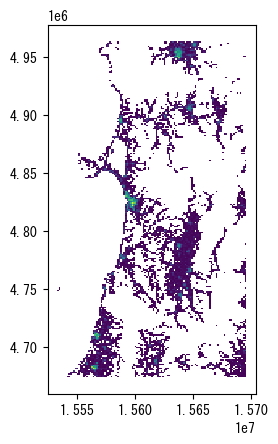

In [69]:
# make a quick plot
akitamesh.plot(column='T001100022')

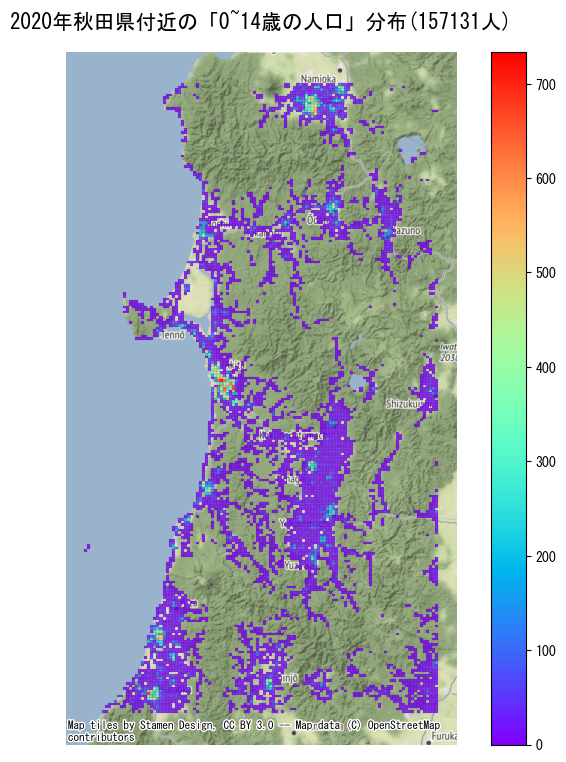

In [81]:
# population map
ax = akitamesh.plot(figsize=(9,9),
         column='T001100004',
         legend=True,
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.08,
         alpha=0.8)

# hide axes
ax.axis('off')

# 列の数字の合計を計算する
column_sum = int(akitamesh['T001100004'].sum())

# title
ax.set_title("2020年秋田県付近の「0~14歳の人口」分布({}人)".format(column_sum),fontsize=15)

# add basemap
cx.add_basemap(ax)

↑　人口数もやっぱり気になったので足し算してみました。秋田県だけの数字ではありませんが、間違ってはいないはずです。
若者でもそれなりに分散しているように思いました。

rainbowにしたら、人がほとんどいないところと集中しているところが極端であることがわかりやすくなりました。0に近い色が多い！

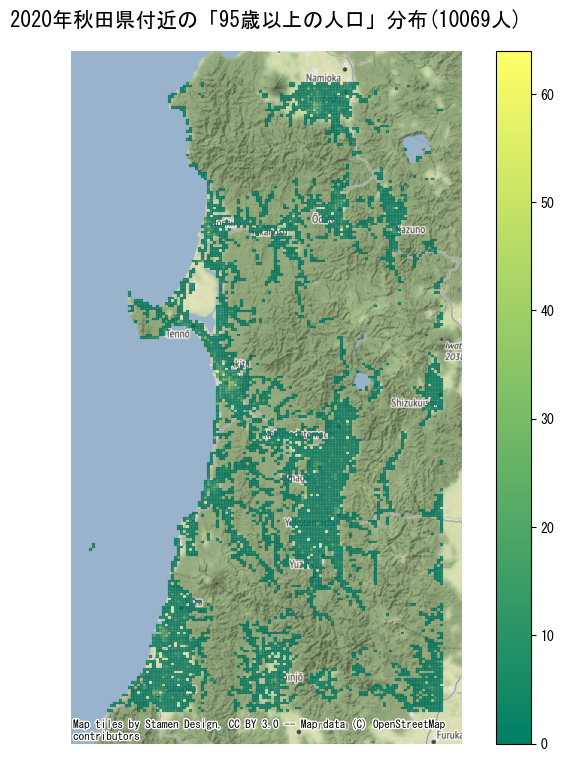

In [84]:
# population map
ax = akitamesh.plot(figsize=(9,9),
         column='T001100028',
         legend=True,
         cmap='summer',
         edgecolor='black',
         linewidth=0.08,
         alpha=0.8)

# hide axes
ax.axis('off')

# 列の数字の合計を計算する
column_sum = int(akitamesh['T001100028'].sum())

# title
ax.set_title("2020年秋田県付近の「95歳以上の人口」分布({}人)".format(column_sum),fontsize=15)

# add basemap
cx.add_basemap(ax)

↑　10人単位くらいで分散している？

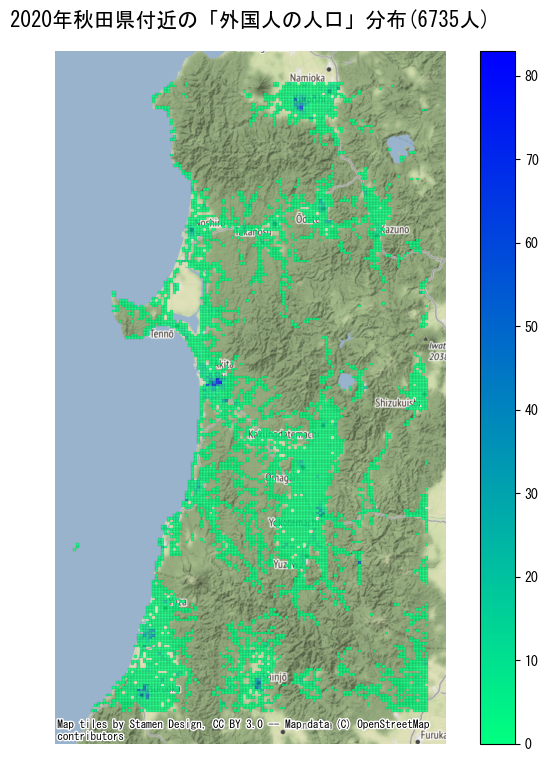

In [86]:
# population map
ax = akitamesh.plot(figsize=(9,9),
         column='T001100031',
         legend=True,
         cmap='winter_r',
         edgecolor='black',
         linewidth=0.08,
         alpha=0.8)

# hide axes
ax.axis('off')

# 列の数字の合計を計算する
column_sum = int(akitamesh['T001100031'].sum())

# title
ax.set_title("2020年秋田県付近の「外国人の人口」分布({}人)".format(column_sum),fontsize=15)

# add basemap
cx.add_basemap(ax)

↑　中央の青い部分には大学が密集していることが関係してそう。

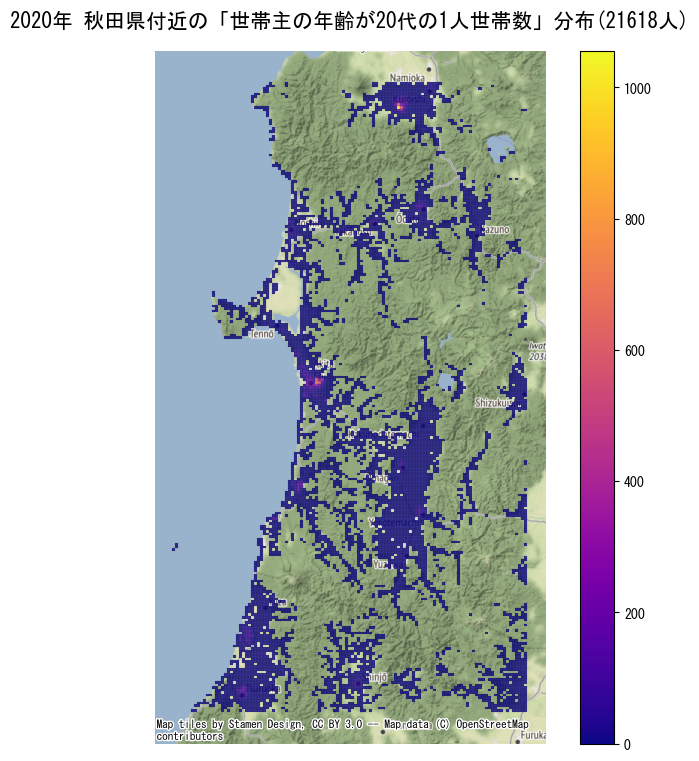

In [87]:
# population map
ax = akitamesh.plot(figsize=(9,9),
         column='T001100048',
         legend=True,
         cmap='plasma',
         edgecolor='black',
         linewidth=0.08,
         alpha=0.8)

# hide axes
ax.axis('off')

# 列の数字の合計を計算する
column_sum = int(akitamesh['T001100048'].sum())

# title
ax.set_title("2020年 秋田県付近の「世帯主の年齢が20代の1人世帯数」分布({}人)".format(column_sum),fontsize=15)

# add basemap
cx.add_basemap(ax)

↑　白い部分はどちらも大学生の一人暮らしが多そう。就職をするとなると県外に出て行ってしまうのだと思う。